In [1]:
import os
import re
from tqdm import tqdm
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import torch
import torch.nn as nn
import matplotlib.dates as plt_dates
%matplotlib inline

In [16]:
# pd_dataframe = pd.read_csv("tcc_ceds_music.csv", delimiter=",", encoding='latin-1', header=None)
# pd_dataframe = pd.read_csv("01-taylor_swift.csv", delimiter=",", encoding='latin-1', header=None)
pd_dataframe = pd.read_csv("lyrics-dataset-v4.csv", delimiter=",", encoding='latin-1', header=None)

In [17]:
pd_dataframe

,0,1,2,3,4,5
0,lyrics,genre,year,number_of_words,number_of_unique_words,lyrics_no_stopwords_lemmatized
1,we got butter aiyo one thing for sure keep you...,hiphop,NaN,275,176,got butter one thing sure keep keep nice crib ...
2,aye it is sean paul long side the mandem calle...,pop,NaN,210,103,aye long side jay fi di gal em tell em drink l...
3,beauty finds refuge in herself lovers wrapped ...,indie,NaN,57,43,beauty find refuge lover wrapped inside lie be...
4,you have changed your tune many times since we...,rock,NaN,132,62,tune many time since met always recognize part...
...,...,...,...,...,...,...
56521,cause fuck leave scar tick tock clock come kno...,hiphop,2019,63,59,cause leave scar tick tock clock come knock do...
56522,minks things chain ring braclets yap fame come...,hiphop,2019,58,42,mink thing chain ring yap fame come fool want ...
56523,get ban get ban stick crack relax plan attack ...,hiphop,2019,64,59,get ban get ban stick crack relax plan attack ...
56524,check check yeah yeah hear thing call switch g...,hiphop,2019,62,41,check check yeah yeah hear thing call switch g...


In [18]:
# lyrics = pd_dataframe[5].values[1:] # tcc
# lyrics = pd_dataframe[3].values[1:] # Taylor Swift
lyrics = pd_dataframe[0].values[1:]

In [19]:
aux = []
for x in lyrics:
  aux.append(str(x))

In [20]:
aux = np.array(aux, dtype=np.object)

/tmp/ipykernel_390418/2369186329.py:1: DeprecationWarning:

`np.object` is a deprecated alias for the builtin `object`. To silence this warning, use `object` by itself. Doing this will not modify any behavior and is safe. 
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations



In [ ]:
aux

In [24]:
stopwords = ["you", "the", "to", "and", "is", "it", "not", "me", "my", "in", "that", 
             "am", "do", "on", "your", "we", "of", "all", "are", "will"]

In [25]:
total_result = []
for query in aux:
    querywords = query.split()
    resultwords  = [word for word in querywords if word.lower() not in stopwords]
    result = ' '.join(resultwords)
    total_result.append(result)
total_result = np.array(total_result, dtype=object)

In [ ]:
print(total_result)

In [27]:
from bertopic import BERTopic

topic_model = BERTopic(language="english", calculate_probabilities=True, verbose=True)
topics, probs = topic_model.fit_transform(total_result)

Batches:   0%|          | 0/1767 [00:00<?, ?it/s]

2022-04-07 19:35:43,834 - BERTopic - Transformed documents to Embeddings
2022-04-07 19:36:06,493 - BERTopic - Reduced dimensionality with UMAP
2022-04-07 19:36:11,845 - BERTopic - Clustered UMAP embeddings with HDBSCAN


In [28]:
freq = topic_model.get_topic_info(); freq.head(5)

,Topic,Count,Name
0,0,56165,0_like_know_can_for
1,1,288,1_christmas_santa_year_for
2,2,23,2_wonderland_sleigh_winter_snow
3,3,22,3_gtr_riff_guitar_pm
4,-1,16,-1_diamonds_christmas_looking_new


In [29]:
topic_model.get_topic(0)  # Select the most frequent topic

[('like', 0.03058694926332485),
 ('know', 0.028591695404619394),
 ('can', 0.026566320584324975),
 ('for', 0.026073280337084944),
 ('be', 0.025987796406823672),
 ('so', 0.02441667191976555),
 ('up', 0.023758088998203804),
 ('with', 0.023518655154801938),
 ('but', 0.023511390341651228),
 ('love', 0.022403670290942965)]

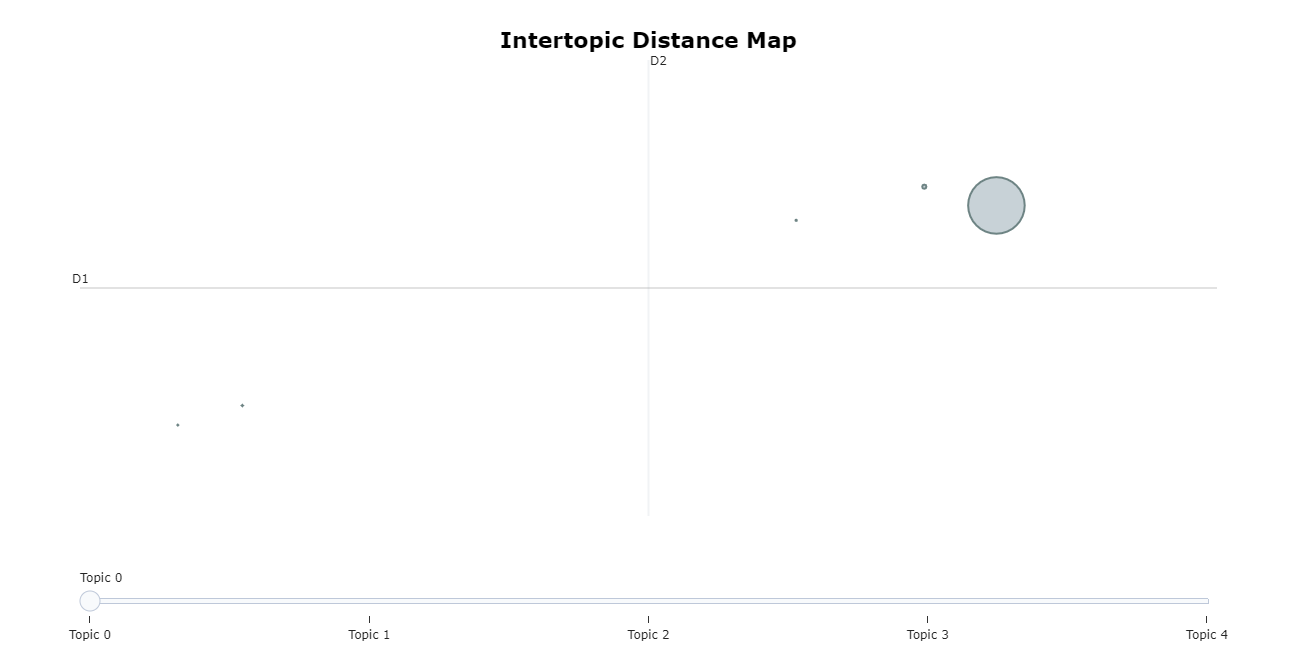

In [30]:
topic_model.visualize_topics()

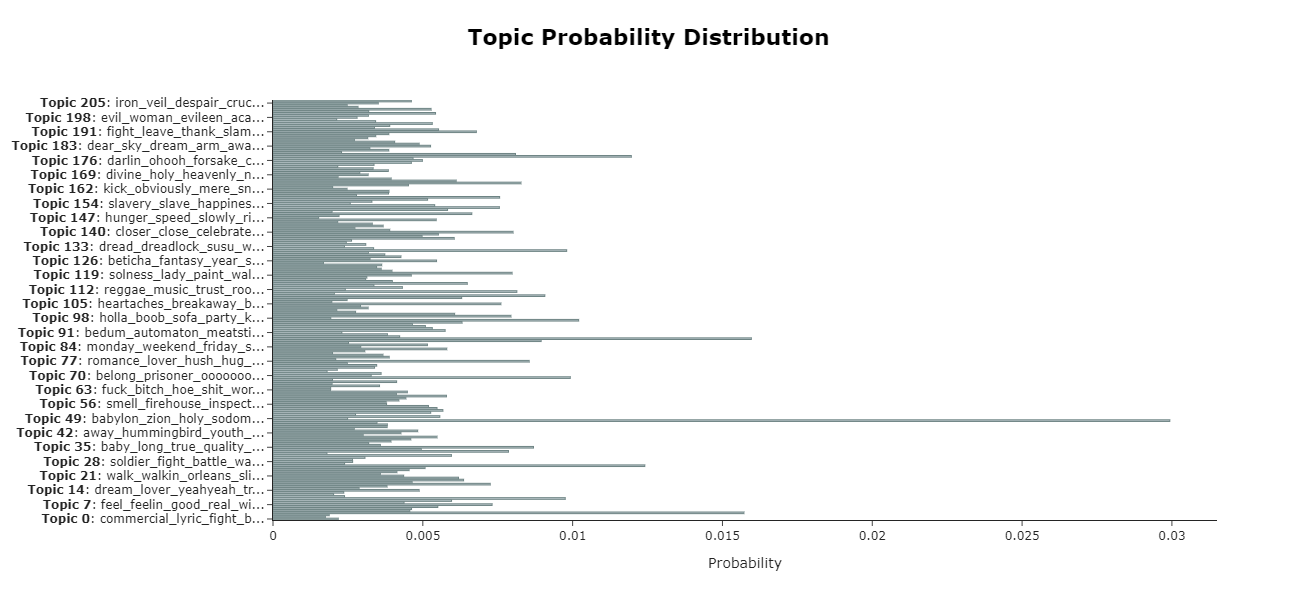

In [9]:
topic_model.visualize_distribution(probs[200], min_probability=0.0015)


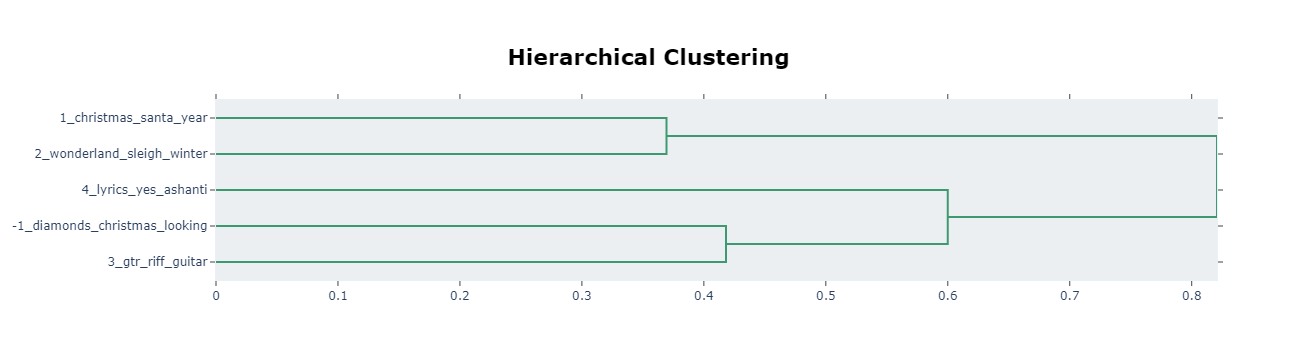

In [31]:
topic_model.visualize_hierarchy(top_n_topics=34)

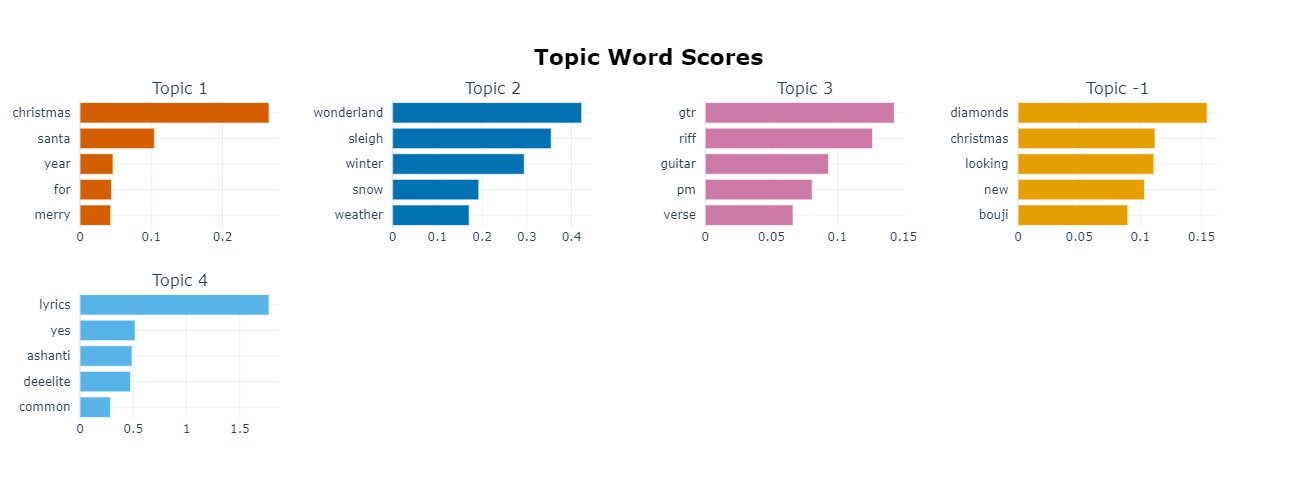

In [32]:
topic_model.visualize_barchart(top_n_topics=50)

In [ ]:
genres = pd_dataframe[4].values[1:] # tcc
lyrics = pd_dataframe[5].values[1:] # tcc
year = pd_dataframe[3].values[1:] # tcc

In [ ]:
from collections import Counter, defaultdict
from tqdm import tqdm

In [ ]:
topics_per_genre = defaultdict(list)

In [ ]:
for idx, i in enumerate(genres):
    topics_per_genre[i].append(topics[idx])

In [ ]:
for key in topics_per_genre:
    print("For the {} genre the most popular topics are:".format(key))
#     print("For the {}s the most popular topics are:".format(key))
    i = 0
    counter = Counter(topics_per_genre[key])
    for key2 in counter:
        if i > 10:
            break
        print(np.array(topic_model.get_topic(key2), dtype=object)[:, 0])
        i += 1
    print(" ")
#     print(key, Counter(topics_per_genre[key]))

In [ ]:
topic_model.get_topic(9)  # Select the most frequent topic

In [ ]:
i = 0
for idx, inp in tqdm(enumerate(lyrics)):
#     if i > 100:
#         break
    topics_per_genre[genres[idx]].append(topic_model.transform(inp)[0][0])
#     print(topic_model.transform(inp)[0][0])
#     i += 1

In [ ]:
topics_per_genre

In [ ]:
import gensim.downloader as api
wv = api.load('word2vec-google-news-300')

In [ ]:
import statistics

In [ ]:
def topic_coherence(index):
    """
    Input: index of a topic 
    Output: coherence score
    """
    topic_words = [word for (word, _) in topic_model.topics[index]]
    similarities = [wv.similarity(w1, w2) for w1 in topic_words for w2 in topic_words 
                  if w1 != w2 if w1 in wv and w2 in wv]
    return statistics.mean(similarities)

In [ ]:
def overall_topic_coherence():
    tc_scores = [topic_coherence(topic) for topic in topic_model.topics]
    print("Minimum  topic coherence: {}".format(min(tc_scores)))
    print("Maximum  topic coherence: {}".format(max(tc_scores)))
    print("Mean  topic coherence: {}".format(statistics.mean(tc_scores)))
    print("Median  topic coherence: {}".format(statistics.median(tc_scores)))

In [ ]:
overall_topic_coherence()

In [ ]:
from sklearn.metrics.pairwise import cosine_similarity

def topic_pairwise_similarity(index1, index2):
    """
    Input: indexes of 2 distinct topics
    Output: dissimilarity score
    """
    topic_words1 = [word for (word, _) in topic_model.topics[index1]][:5]
    topic_words2 = [word for (word, _) in topic_model.topics[index2]][:5]

    similarities = [wv.similarity(w1, w2) for w1 in topic_words1 for w2 in topic_words2 
                  if w1 in wv and w2 in wv]
    """
    median_vector1 = sum([wv[w] for w in topic_words1 if w in wv.vocab])
    median_vector2 = sum([wv[w] for w in topic_words2 if w in wv.vocab])

    return cosine_similarity([median_vector1], [median_vector2])
    """
    return statistics.mean(similarities)

In [ ]:
def topic_diversity():
    td_scores = [topic_pairwise_similarity(t1, t2) for t1 in topic_model.topics for t2 in topic_model.topics if t1 != t2]
    print("Minimum  topic diversity: {}".format(min(td_scores)))
    print("Maximum  topic diversity: {}".format(max(td_scores)))
    print("Mean  topic diversity: {}".format(statistics.mean(td_scores)))
    print("Median  topic diversity: {}".format(statistics.median(td_scores)))

In [ ]:
topic_diversity()